In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
PASTA_EEG = "data/train_eegs/"
PASTA_SPECTOGRAM = "data/train_spectrograms/"
SPS = 200 #samples per second

In [3]:
eeg_id = 1628180742

In [4]:
df = pd.read_parquet(PASTA_EEG + str(eeg_id) + '.parquet', engine='pyarrow')

In [5]:
df

,Fp1,F3,C3,P3,F7,T3,T5,O1,Fz,Cz,Pz,Fp2,F4,C4,P4,F8,T4,T6,O2,EKG
0,-80.519997,-70.540001,-80.110001,-108.750000,-120.330002,-88.620003,-101.750000,-104.489998,-99.129997,-90.389999,-97.040001,-77.989998,-88.830002,-112.120003,-108.110001,-95.949997,-98.360001,-121.730003,-106.449997,7.920000
1,-80.449997,-70.330002,-81.760002,-107.669998,-120.769997,-90.820000,-104.260002,-99.730003,-99.070000,-92.290001,-96.019997,-84.500000,-84.989998,-115.610001,-103.860001,-97.470001,-89.290001,-115.500000,-102.059998,29.219999
2,-80.209999,-75.870003,-82.050003,-106.010002,-117.500000,-87.489998,-99.589996,-96.820000,-119.680000,-99.360001,-91.110001,-99.440002,-104.589996,-127.529999,-113.349998,-95.870003,-96.019997,-123.879997,-105.790001,45.740002
3,-84.709999,-75.339996,-87.480003,-108.970001,-121.410004,-94.750000,-105.370003,-100.279999,-113.839996,-102.059998,-95.040001,-99.230003,-101.220001,-125.769997,-111.889999,-97.459999,-97.180000,-128.940002,-109.889999,83.870003
4,-90.570000,-80.790001,-93.000000,-113.870003,-129.960007,-102.860001,-118.599998,-101.099998,-107.660004,-102.339996,-98.510002,-95.300003,-88.930000,-115.639999,-99.800003,-97.500000,-88.730003,-114.849998,-100.250000,97.769997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,-144.660004,-147.809998,-129.820007,-129.460007,-157.509995,-124.000000,-124.570000,-94.820000,-153.070007,-121.110001,-86.459999,-132.520004,-138.339996,-128.970001,-71.300003,-114.480003,-86.709999,-114.959999,-81.500000,-20.070000
17996,-140.880005,-153.000000,-129.529999,-129.020004,-154.059998,-131.220001,-128.380005,-95.000000,-140.820007,-114.639999,-84.379997,-115.339996,-119.230003,-114.709999,-70.989998,-92.129997,-79.639999,-116.139999,-81.879997,10.600000
17997,-133.729996,-141.770004,-121.900002,-122.370003,-158.750000,-123.550003,-127.730003,-93.089996,-125.230003,-106.489998,-83.419998,-112.720001,-103.209999,-107.629997,-61.869999,-97.910004,-77.150002,-106.500000,-75.339996,-2.060000
17998,-141.449997,-151.139999,-127.190002,-128.699997,-163.460007,-124.309998,-129.479996,-94.419998,-140.869995,-113.339996,-83.519997,-129.300003,-118.650002,-117.589996,-71.879997,-99.279999,-83.900002,-116.160004,-81.410004,2.820000


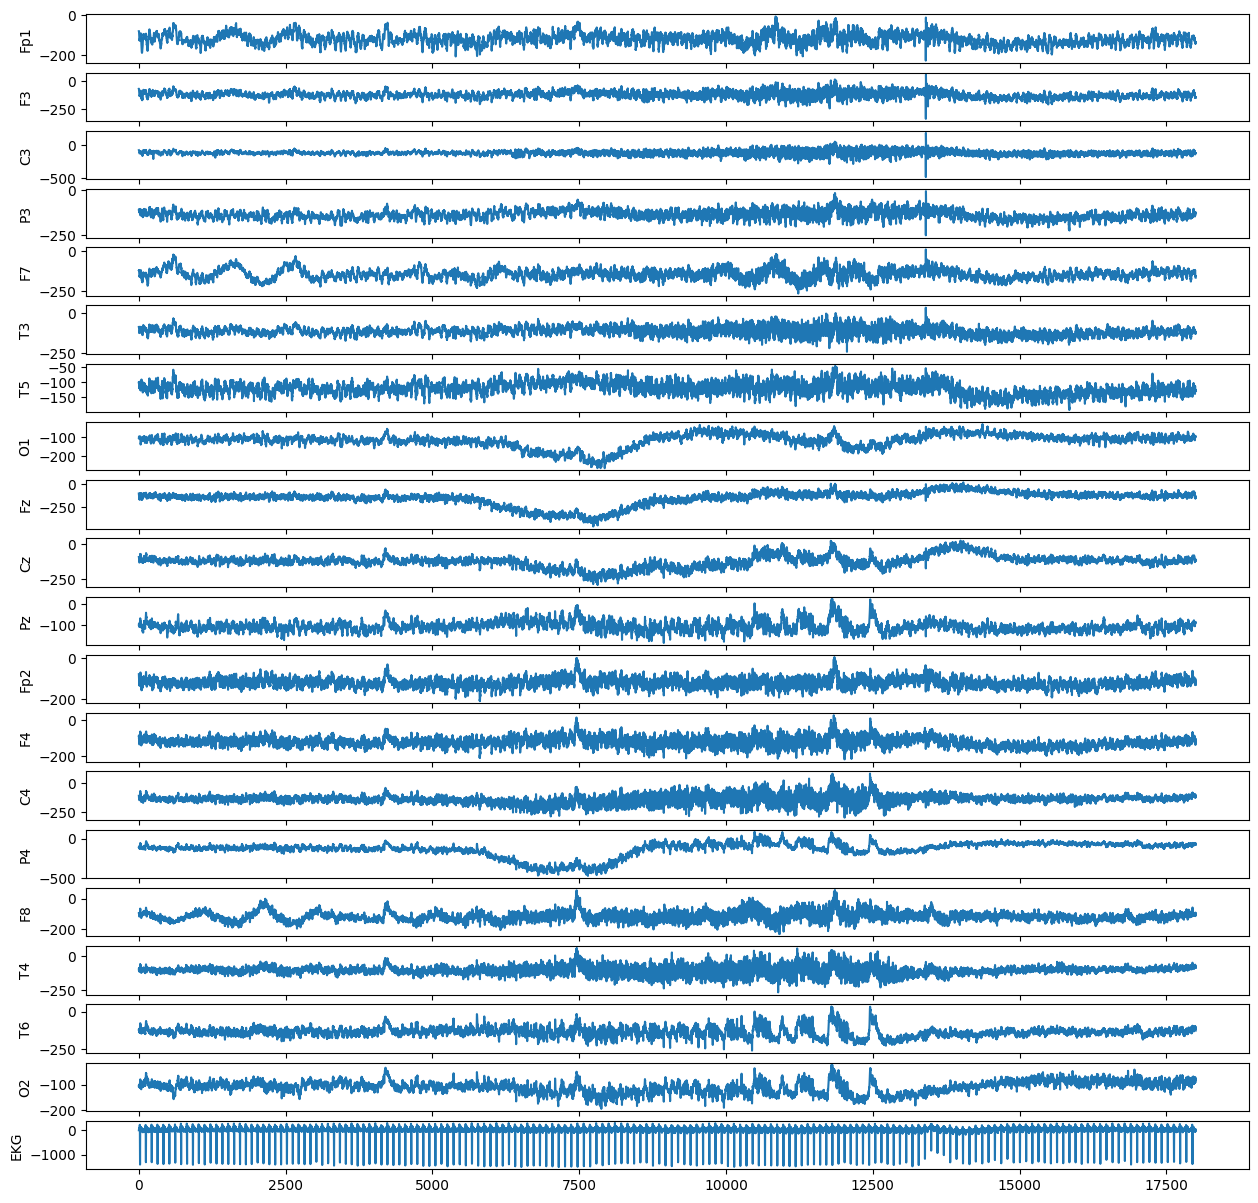

In [6]:
fig, ax = plt.subplots( len(df.columns), figsize=(15, 15))
for i, c in enumerate(df.columns):
    ax[i].plot( df[c] )
    ax[i].set_ylabel(c)

In [7]:
n = df.shape[0]
freqs = np.fft.fftfreq(n-1)

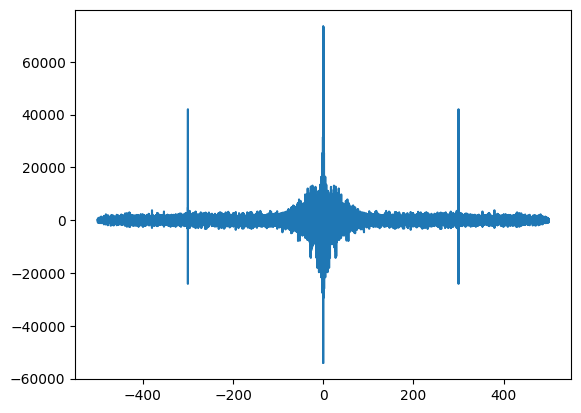

In [8]:
plt.plot(np.fft.fftfreq(n-1, 0.001), np.fft.fft( df["F4"] ).real[1:])

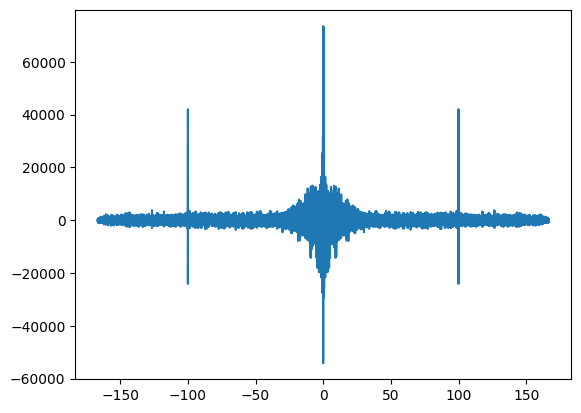

In [9]:
plt.plot(np.fft.fftfreq(n-1, 0.003), np.fft.fft( df["F4"] ).real[1:])

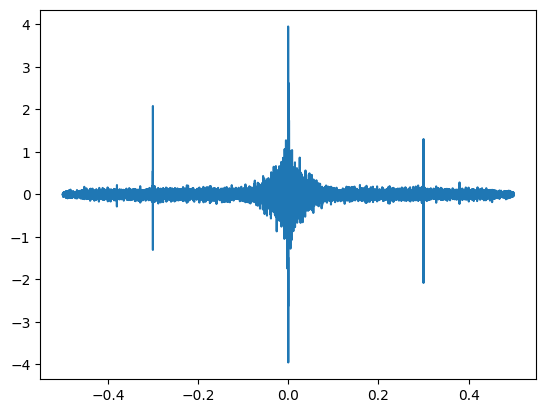

In [10]:
plt.plot(freqs, np.fft.fft( df["F4"] ).imag[1:]/n )

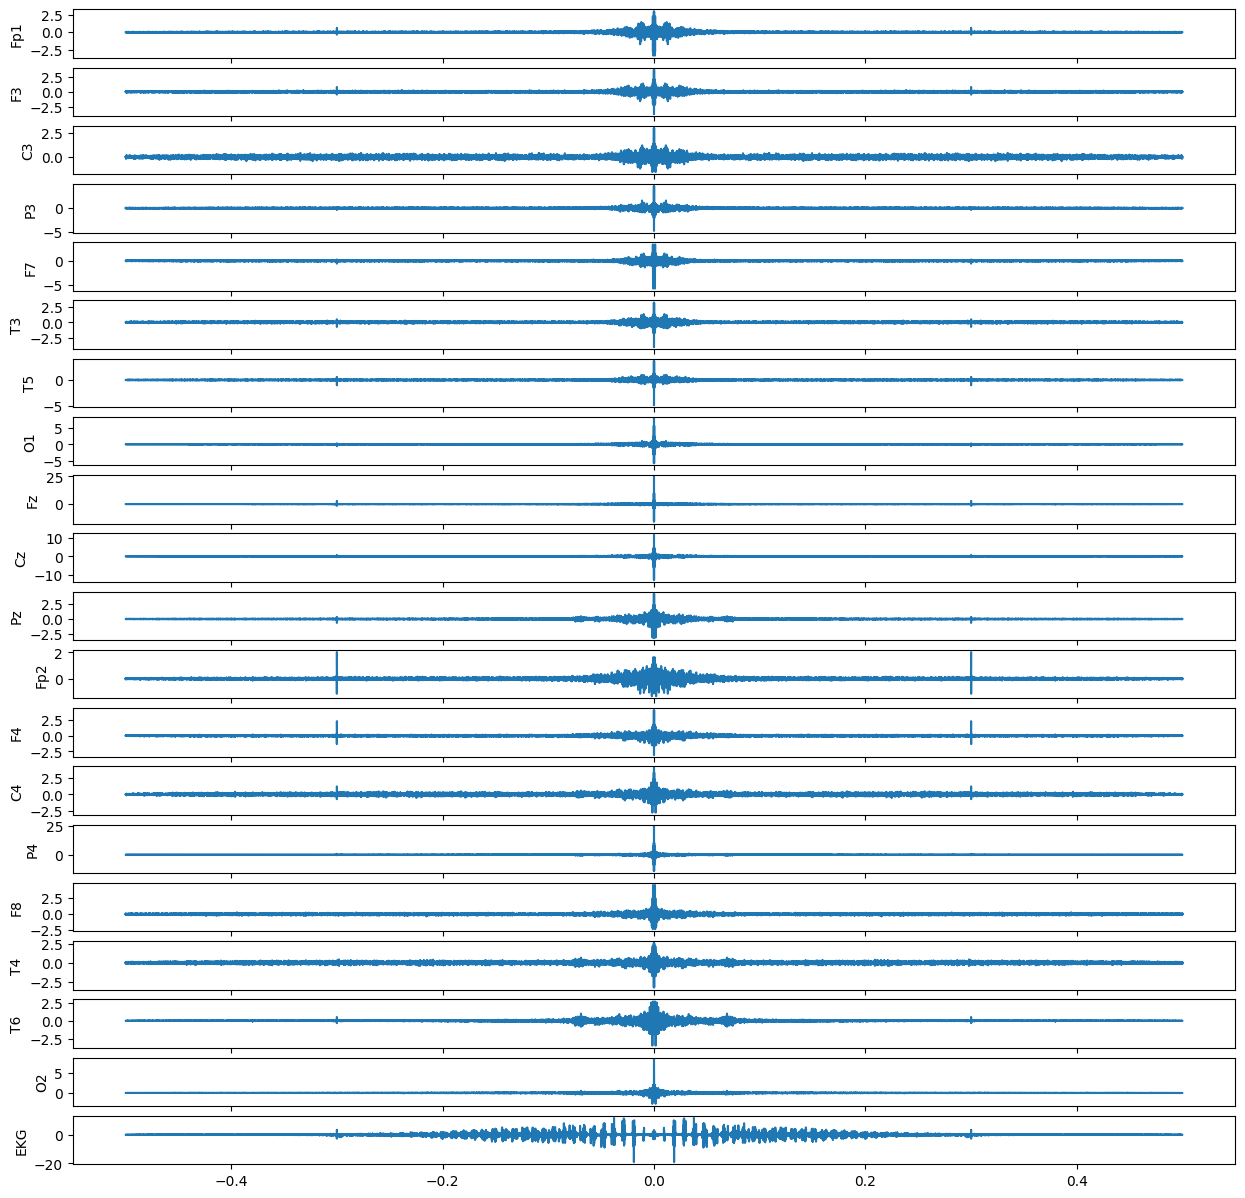

In [11]:
fig, ax = plt.subplots( len(df.columns), figsize=(15, 15))
for i, c in enumerate(df.columns):
    ax[i].plot(freqs, np.fft.fft( df[c] ).real[1:]/n)
    ax[i].set_ylabel(c)

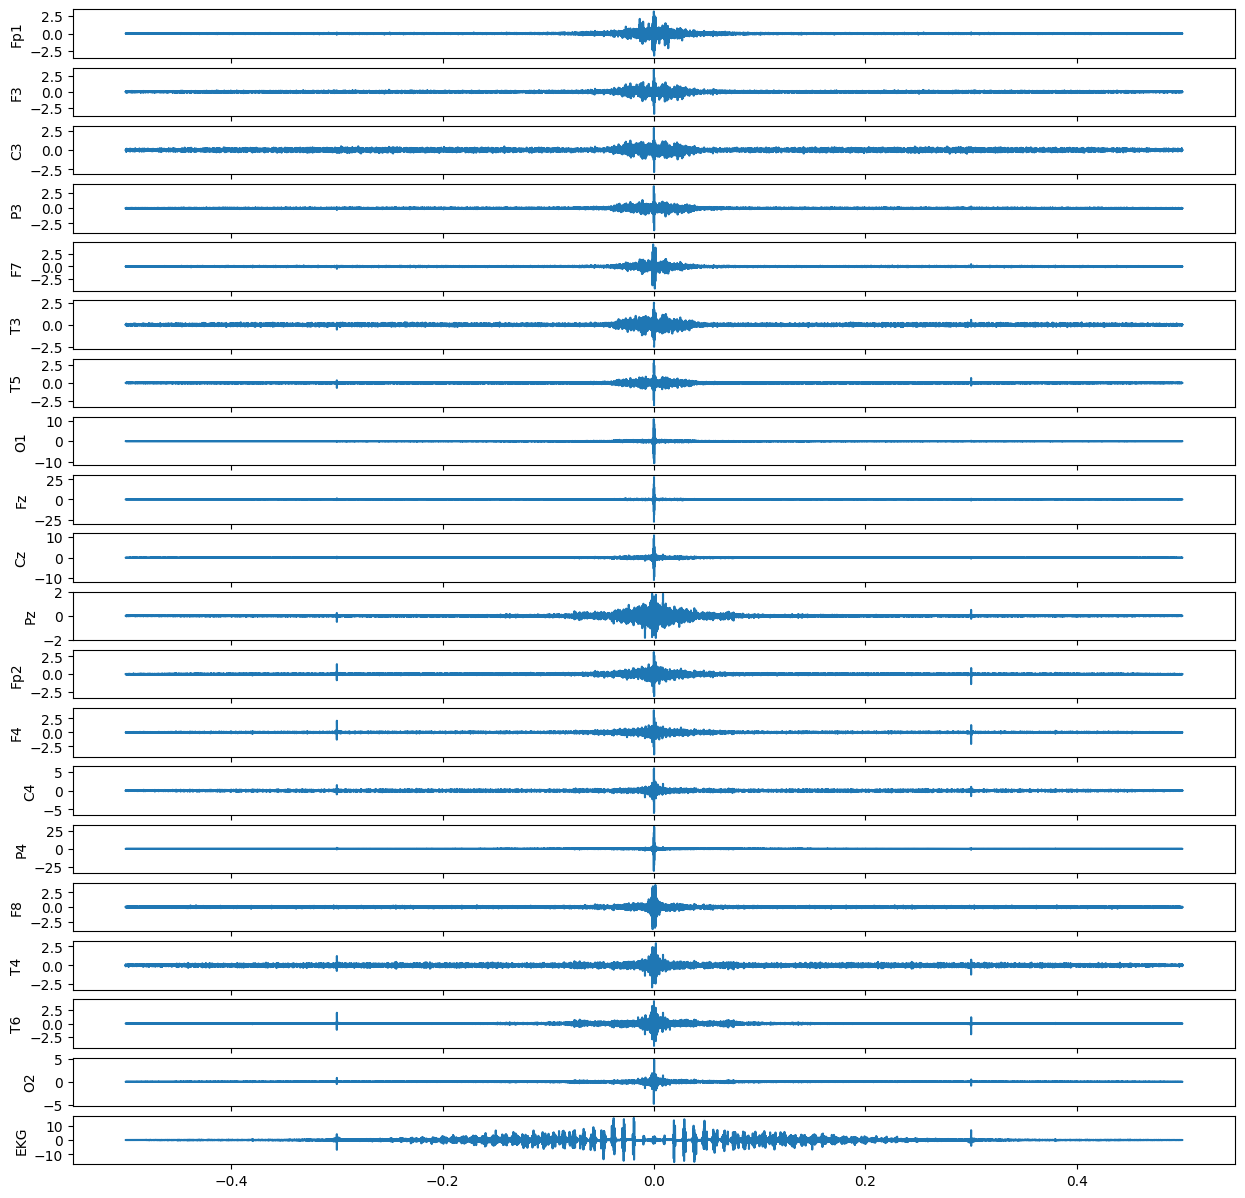

In [12]:
fig, ax = plt.subplots( len(df.columns), figsize=(15, 15))
for i, c in enumerate(df.columns):
    ax[i].plot(freqs, np.fft.fft( df[c] ).imag[1:]/n )
    ax[i].set_ylabel(c)

In [13]:
df.columns

Index(['Fp1', 'F3', 'C3', 'P3', 'F7', 'T3', 'T5', 'O1', 'Fz', 'Cz', 'Pz',
       'Fp2', 'F4', 'C4', 'P4', 'F8', 'T4', 'T6', 'O2', 'EKG'],
      dtype='object')

In [14]:
all_fft = [np.fft.fftshift( np.fft.fft( df[c]  ) ).imag[1:200]/n  for c in df.columns]

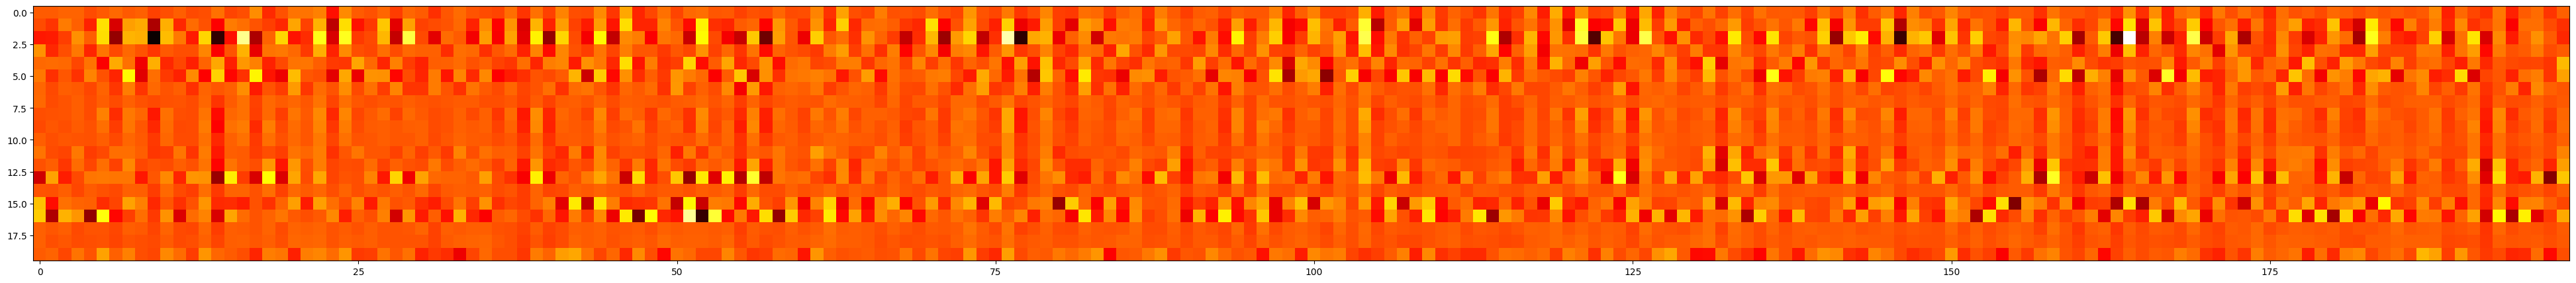

In [15]:
plt.figure(figsize=(500,5))
plt.imshow(all_fft, cmap='hot', interpolation='nearest')

plt.show()

In [16]:
all_fft = [np.fft.fftshift( np.fft.fft( df[c]  ) ).real[1:200]/n  for c in df.columns]

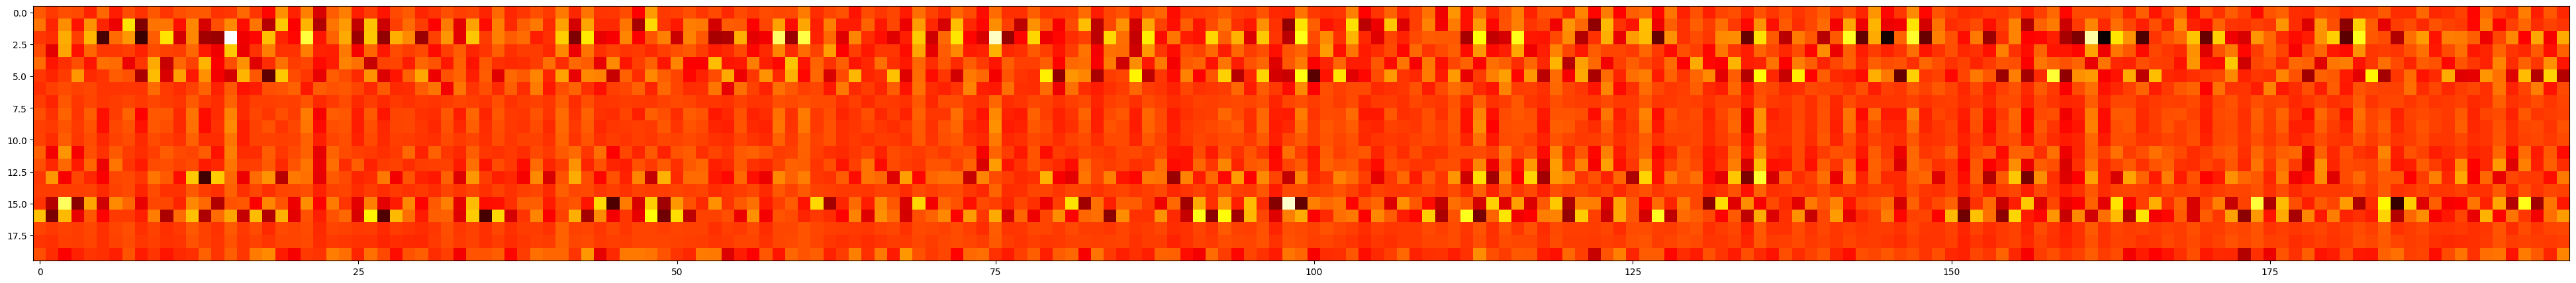

In [17]:
plt.figure(figsize=(500,5))
plt.imshow(all_fft, cmap='hot', interpolation='nearest')
plt.show()

In [18]:
np.fft.fft( df["F4"][:SPS] )

array([-2.06851000e+04+0.00000000e+00j, -2.63977433e+02+4.66451146e+02j,
        5.08015434e+02-3.54636404e+02j, -1.98325676e+02-2.91624309e+02j,
       -9.91005634e+02+2.83074321e+02j,  1.11483206e+02+2.34618383e+02j,
       -2.39798084e+02+9.78485822e+02j,  3.15268680e+02-2.70611523e+02j,
        4.45461916e+02+3.85039655e+01j, -1.27724014e+02-2.87103731e+02j,
        1.81691416e+02-2.39241374e+02j,  1.84946390e+01-2.10468908e+01j,
        4.22377168e+01-5.84825721e+01j, -1.33377842e+01-3.34951286e+02j,
       -7.09000981e+01-1.63676309e+02j, -1.75903357e+02-1.11588635e+02j,
       -5.03019295e+01-1.74489628e+02j,  8.39877894e+01-1.10797376e+02j,
        7.54396786e+01-1.32774030e+02j, -1.15339619e+02-2.34608464e+02j,
        1.87299996e+01-1.45252277e+02j,  6.91738831e+01-1.27236907e+02j,
       -1.31658703e+02-1.35566436e+02j,  1.95056922e+02+7.95089817e+01j,
       -5.22781666e+01-2.92621455e+01j,  1.41891345e+01-1.11081484e+02j,
        4.61070114e+01+7.53469233e+01j, -3.59913153

In [19]:
freqs = np.fft.fftfreq(SPS)

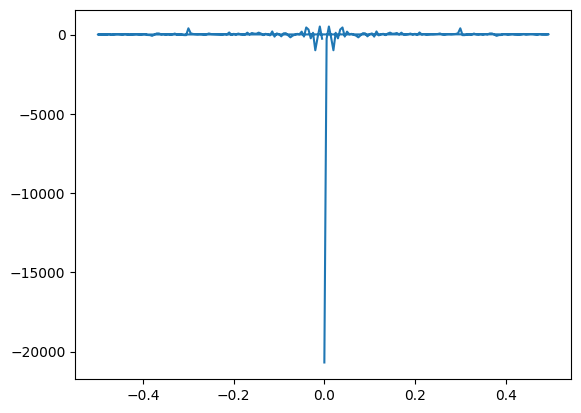

In [20]:
plt.plot(freqs, np.fft.fft( df["F4"][:SPS] ).real  )

In [89]:
signal_size = df["F4"].shape[0]
frame_size = SPS
half_frame = frame_size//2
hop = frame_size//2
windows = ((signal_size-frame_size)//hop) +1
frequency_bins = (SPS//2) +1

In [103]:
reals = np.empty((half_frame,))
imaginaries = np.empty(half_frame,)
for i in range(0, signal_size-hop, hop):
    f = np.fft.fft( df["F4"][i:i+frame_size] )[1:half_frame+1]
    reals = np.vstack([reals, abs(f.real)])
    imaginaries = np.vstack([imaginaries, abs(f.imag)])

In [104]:
reals.shape

(180, 100)

In [113]:
 df["F4"][i:i+frame_size] -  df["F4"][i:i+frame_size].mean()

0      14.595505
1      18.435509
2      -1.164490
3       2.205505
4      14.495506
         ...    
195   -10.374496
196   -22.654495
197   -16.474495
198   -25.554489
199   -26.334488
Name: F4, Length: 200, dtype: float32

In [145]:
reals = np.empty((half_frame,))
imaginaries = np.empty(half_frame,)
for i in range(0, signal_size-hop, hop):
    f = np.fft.fft(  df["F4"][i:i+frame_size] -  df["F4"][i:i+frame_size].mean() )
    reals = np.vstack([reals, abs(f.real[:half_frame])])
    imaginaries = np.vstack([imaginaries, abs(f.imag[:half_frame])])

In [146]:
sampling_rate = SPS
freqs = fftfreq(frame_size, d=1.0/sampling_rate)[:half_frame]

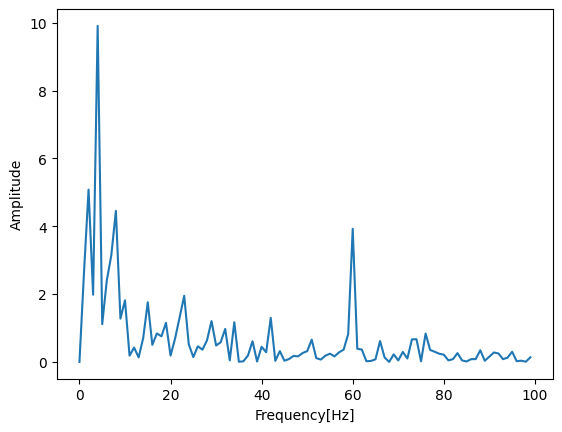

In [147]:
plt.plot(freqs, reals[1]/half_frame )
plt.ylabel('Amplitude')
plt.xlabel('Frequency[Hz]')
plt.show()

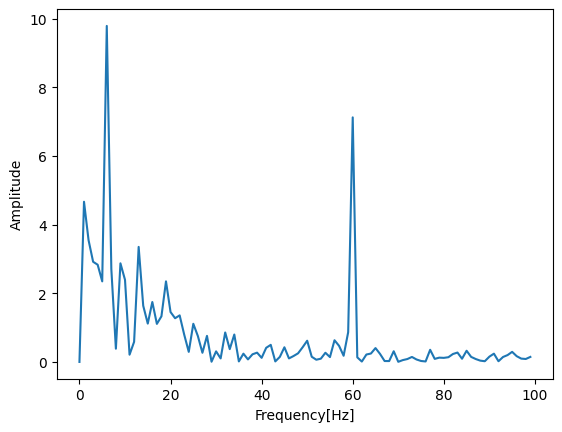

In [148]:
plt.plot(freqs, imaginaries[1]/half_frame )
plt.ylabel('Amplitude')
plt.xlabel('Frequency[Hz]')
plt.show()

In [163]:
range(0, int(max(freqs)), 10)

range(0, 99, 10)

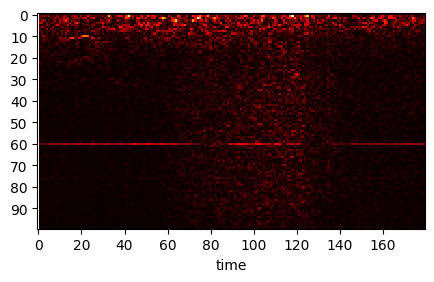

In [167]:
plt.figure(figsize=(5,5))
plt.imshow(reals.T/half_frame , cmap='hot', interpolation='nearest')
plt.xlabel('time')
plt.yticks(range(0, int(max(freqs)), 10))
plt.show()

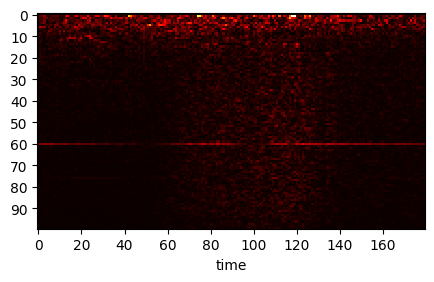

In [168]:
plt.figure(figsize=(5,5))
plt.imshow(imaginaries.T/half_frame , cmap='hot', interpolation='nearest')
plt.xlabel('time')
plt.yticks(range(0, int(max(freqs)), 10))
plt.show()